## PROBLEM STATEMENT:
      
PREDICTION OF HOUSE PRICING USING MACHINE LEARNING WITH PYTHON


## Importing the necessary packages and modules

- <b>numpy</b> package can be used to perform mathematical operations like 'mean'.
- <b>pandas</b> package can be used to process dataframes.
- <b>seaborn</b> package can be used to visualise data in the form of various effective graphs and plots.
- <b>sklearn</b> is the main package which is used for machine learning.
- <b>LabelEncoder</b> is used to encode the non-numeric data into numericals so that machine learning model can be built.
- <b>train_test_split module</b> is used to split the data into training and testing sets.
- <b>LinearRegression</b> module is used to fit a LinearRegression model.
- <b>sklearn.metrics</b> can be used to calculate statistical results like mean squared error, root mean squared error, etc.

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as seb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import r2_score
%matplotlib inline

## Reading the dataset
- The <b>dataset</b> needs to be imported and read - we use <b>pandas</b> to acheive this.

In [2]:
#reading the dataset
train_data = pd.read_csv('house_sales_data.csv')
train_data.head(5)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
train_data.shape

(21613, 21)

In [4]:
train_data.drop(columns=['id','view','condition','grade','sqft_above','yr_built','sqft_lot','yr_renovated','sqft_living15','sqft_lot15'])

,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_basement,zipcode,lat,long
0,20141013,221900.0,3,1.00,1180,1.0,0,0,98178,47.5112,-122.257
1,20141209,538000.0,3,2.25,2570,2.0,0,400,98125,47.7210,-122.319
2,20150225,180000.0,2,1.00,770,1.0,0,0,98028,47.7379,-122.233
3,20141209,604000.0,4,3.00,1960,1.0,0,910,98136,47.5208,-122.393
4,20150218,510000.0,3,2.00,1680,1.0,0,0,98074,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521,360000.0,3,2.50,1530,3.0,0,0,98103,47.6993,-122.346
21609,20150223,400000.0,4,2.50,2310,2.0,0,0,98146,47.5107,-122.362
21610,20140623,402101.0,2,0.75,1020,2.0,0,0,98144,47.5944,-122.299
21611,20150116,400000.0,3,2.50,1600,2.0,0,0,98027,47.5345,-122.069


## Processing the dataset
- After the data has been imported, we have to <b>clean/preprocess</b> the data to actually fit into a <b>regression</b> model

#### 1. Checking for missing entries

In [5]:
#Checking for missing entries
train_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## VISUALIZATIONS OF THE DATA

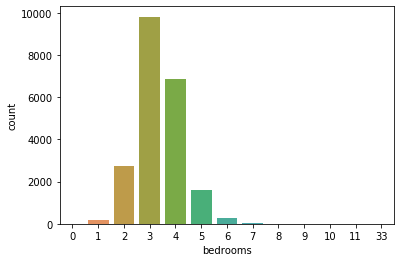

In [6]:
#barplot on bedroooms
seb.countplot(train_data['bedrooms'])

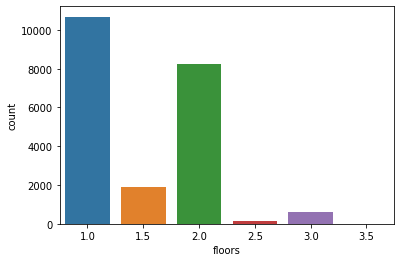

In [7]:
#barplot on floors
seb.countplot(train_data['floors'])

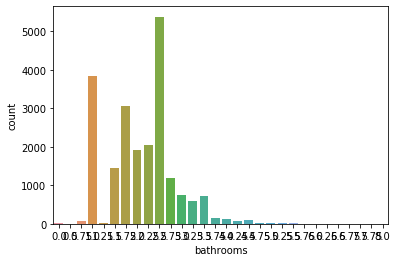

In [8]:
#barplot on bathrooms
seb.countplot(train_data['bathrooms'])

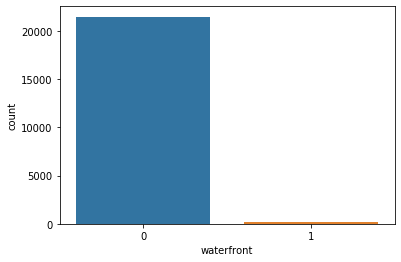

In [9]:
#barplot on waterfront
seb.countplot(train_data['waterfront'])

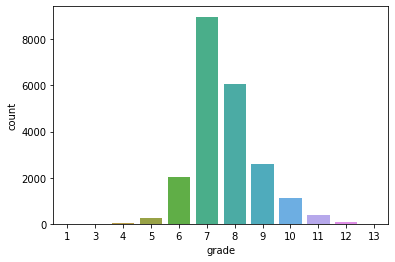

In [10]:
seb.countplot(train_data['grade'])

### 3. Encoding the data set so as to make it easy for building machine learning model
- The original data has <b>non-numerical</b> entries for few columns
- We encode these non-numerical entries using <b>LabelEncoder</b>

In [11]:
label_enc = LabelEncoder()
data_enc = train_data

# encoding few string-contained columns
#data_enc.Product_ID = label_enc.fit_transform(train_data.Product_ID)
data_enc.waterfront = label_enc.fit_transform(train_data.waterfront)
data_enc.head(10)



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512,1230000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


#### Finding the correlation using corr()

In [12]:
#Finding the correlation using corr()
train_data.corr()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.009857,-0.016797,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,...,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
date,0.009857,1.000000,0.003011,-0.010493,-0.027523,-0.029791,0.005599,-0.022550,-0.003798,0.001063,...,-0.031464,-0.024421,-0.016130,0.003248,-0.024070,0.001235,-0.029770,-0.000301,-0.022752,0.000154
price,-0.016797,0.003011,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.397346,...,0.667463,0.605566,0.323837,0.053982,0.126442,-0.053168,0.306919,0.021571,0.585374,0.082456
bedrooms,0.001286,-0.010493,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,...,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,-0.027523,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,...,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,-0.029791,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,...,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.005599,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,...,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,-0.022550,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,...,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,-0.003798,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,...,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.001063,0.397346,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,...,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575


### visualizing the correlation

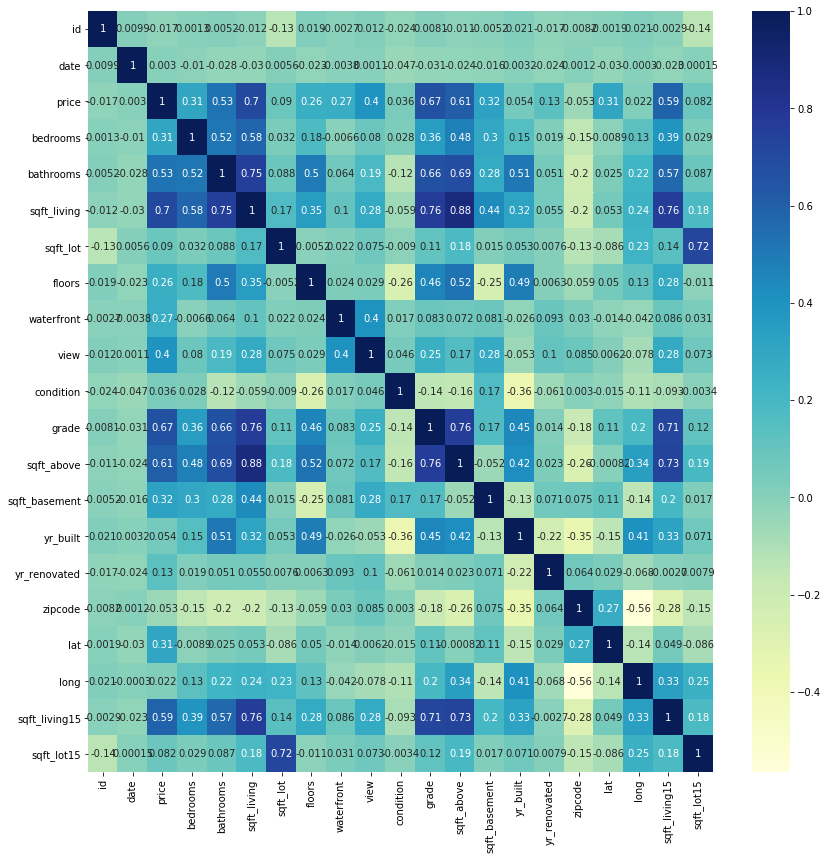

In [13]:
#visualizing the correlation
plt.figure(figsize=(14,14))
seb.heatmap(train_data.corr(),annot=True,cmap='YlGnBu')

## Declaring input and output variables
- Input variables are considered as all the columns except the Purchase column
- Output variables are considered as the last column, i.e, the Purchase column

In [14]:
#Declaring input and output variables
X=train_data.drop(['price'],axis=1)
y=train_data.price

## Splitting the data into train and test sets
- Input train and test sets are 2 dimensional
- Output train and test sets are 1 dimensional

In [15]:
#divide the X and y into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16209, 20)
(5404, 20)
(16209,)
(5404,)


## Fitting the data into Linear Regression model

In [16]:
#Fitting the data into Linear Regression model
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### intercept and coefficient values

In [17]:
#intercept and coefficient values
print(lm.intercept_)
lm.coef_

-64311704.26838564


array([-1.43118221e-06,  3.39620948e+00, -3.31970856e+04,  3.43628407e+04,
        1.11342875e+02,  1.75115838e-01,  1.23078695e+04,  6.12741964e+05,
        5.04666180e+04,  2.86207206e+04,  9.47344313e+04,  6.69725948e+01,
        4.43702801e+01, -2.56332132e+03,  2.27184570e+01, -5.50529117e+02,
        6.06775307e+05, -2.07808176e+05,  2.81413801e+01, -4.45231202e-01])

### creating a dataframe for cofficients

In [18]:
#creating a dataframe for cofficients
coefficients=pd.DataFrame([X_train.columns,lm.coef_]).T
coefficients

,0,1
0,id,-1.43118e-06
1,date,3.39621
2,bedrooms,-33197.1
3,bathrooms,34362.8
4,sqft_living,111.343
5,sqft_lot,0.175116
6,floors,12307.9
7,waterfront,612742
8,view,50466.6
9,condition,28620.7


### checking the model prediction on training data

In [19]:
#checking the model prediction on training data
y_train_pred = lm.predict(X_train)
y_train_pred

array([239946.65604577, 626093.45027984, 660257.21464739, ...,
       626236.47679655, 482824.07957322, 542928.42368714])

### comparing the actual values(y_train) and the predicted values(y_train_pred)

In [20]:
#comparing the actual values(y_train) and the predicted values(y_train_pred)
y_train==y_train_pred

1956     False
15678    False
8729     False
19064    False
11291    False
         ...  
13123    False
19648    False
9845     False
10799    False
2732     False
Name: price, Length: 16209, dtype: bool

In [21]:
#r2_score
from sklearn.metrics import r2_score
print("R^2:",r2_score(y_train,y_train_pred))
print("Adjusted R^2:",1-(1-r2_score(y_train,y_train_pred))*(len(X_train)-1)/
     (len(X_train)-X_train.shape[1]-1))

R^2: 0.7043486540498882
Adjusted R^2: 0.7039833818161965


### regplot

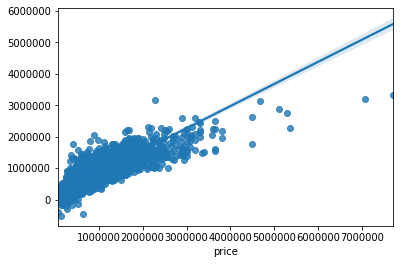

In [22]:
#regplot
seb.regplot(y_train,y_train_pred)

###  Visualizing the differences between acutal values and predicted values

Text(0, 0.5, 'model predicted purchase')

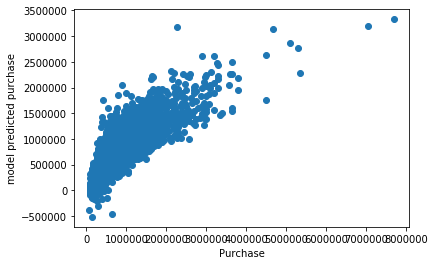

In [23]:
#Visualizing the differences between acutal values and predicted values
plt.scatter(y_train,y_train_pred)
plt.xlabel('Purchase')
plt.ylabel('model predicted purchase')

### plot for residuals(errors)
-  y_train-y_train_pred=Errors

Text(0, 0.5, 'errors')

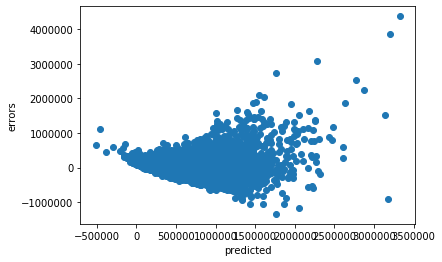

In [24]:
#plot for residuals(errors)
plt.scatter(y_train_pred,y_train-y_train_pred)
plt.xlabel("predicted")
plt.ylabel("errors")

### Predicting the output test values for input test values

In [25]:
#Predicting the output test values for input test values
y_test_pred=lm.predict(X_test)
y_test_pred

array([ 379999.00895102, 1524808.66022637,  534097.77845981, ...,
        740534.70096395,  220123.8309894 ,  580489.20148619])

### Comparing the actual output test values with the predicted output test values
- returning boolean values while comparing the output test values with predicted output test values

In [26]:
#Comparing the actual output test values with the predicted output test values
y_test==y_test_pred

17384    False
722      False
2680     False
18754    False
14554    False
         ...  
8709     False
12346    False
10458    False
10894    False
15647    False
Name: price, Length: 5404, dtype: bool

### Visualising the data for the actual values vs. the predicted values

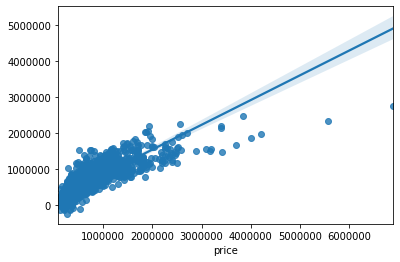

In [27]:
#Visualising the data for the actual values vs. the predicted values
seb.regplot(y_test, y_test_pred)

#### Visualizing the differences between acutal values and predicted values

Text(0, 0.5, 'Model Predicted Price')

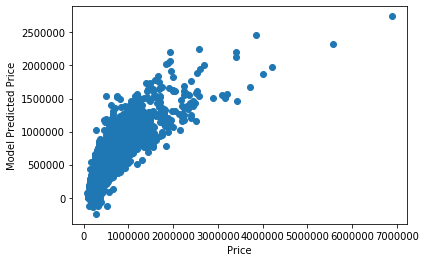

In [28]:
#Visualizing the differences between acutal values and predicted values
plt.scatter(y_test, y_test_pred)
plt.xlabel('Price')
plt.ylabel('Model Predicted Price')

#### plot for residuals(errors)

Text(0, 0.5, 'errors')

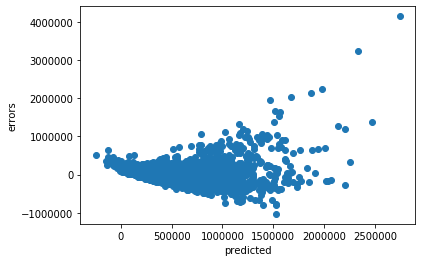

In [29]:
#plot for residuals(errors)
plt.scatter(y_test_pred,y_test-y_test_pred)
plt.xlabel("predicted")
plt.ylabel("errors")

### Statistical Results

In [30]:
#Statistical Results
difference = np.mean(y_test) - np.mean(y_test_pred)
error = (np.mean(y_test) - np.mean(y_test_pred))/np.mean(y_test)

print('Predicted Mean : %.2f' % np.mean(y_test_pred), end = '\n\n')
print('Actual Mean : %.2f' % np.mean(y_test), end = '\n\n')
print('Difference : %.2f' % difference, end = '\n\n')
print('Coefficients :')
print(lm.coef_, end = '\n\n')
print('Variance score: %.4f' % lm.score(X_test, y_test), end = '\n\n')  
print('Percentage Error : %.4f' % (error*100), end = '\n\n')

Predicted Mean : 536509.96

Actual Mean : 535194.21

Difference : -1315.75

Coefficients :
[-1.43118221e-06  3.39620948e+00 -3.31970856e+04  3.43628407e+04
  1.11342875e+02  1.75115838e-01  1.23078695e+04  6.12741964e+05
  5.04666180e+04  2.86207206e+04  9.47344313e+04  6.69725948e+01
  4.43702801e+01 -2.56332132e+03  2.27184570e+01 -5.50529117e+02
  6.06775307e+05 -2.07808176e+05  2.81413801e+01 -4.45231202e-01]

Variance score: 0.6912

Percentage Error : -0.2458



### Error Metrics
1. Mean Absolute Error
2. Mean Squared Error
3. Root Mean Squared Error
### Performance Metrics
1. R^2 value
2. Adjusted R^2 value

In [31]:
#Error Metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print("R^2:",r2_score(y_test,y_test_pred))
print("MAE:",mean_absolute_error(y_test,y_test_pred))
print("MSE:",mean_squared_error(y_test,y_test_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_test_pred)))

R^2: 0.6912143237690274
MAE: 123084.86547643815
MSE: 41073289683.144936
RMSE: 202665.4624822516


## scaling

In [32]:
# Scaling Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling for training data
scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
scaled_X_train

#Scaling for test data
#Testing the data based on training data
scaled_X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
scaled_X_test

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,-1.086728,-0.651031,-1.448419,-0.801701,-0.704248,-0.321932,2.769831,-0.089917,-0.307897,-0.624125,-0.559724,-0.430582,-0.659256,0.949185,-0.211808,0.884880,1.166900,-0.540804,-0.810524,-0.409848
1,-0.817465,-0.700757,0.667617,1.467506,2.799781,0.864530,0.925552,-0.089917,-0.307897,0.912395,3.686542,3.459542,-0.659256,0.576277,-0.211808,-1.360248,0.538436,0.354685,3.261763,1.031729
2,-0.627961,-0.741933,-1.448419,-1.774219,-0.693433,-0.273468,-0.918726,-0.089917,-0.307897,-0.624125,-0.559724,-0.706733,-0.118440,-1.932377,-0.211808,0.548111,0.795732,-1.066726,-0.795980,-0.312950
3,0.786002,-0.742158,-1.448419,-1.450046,-1.028695,-0.298528,-0.918726,-0.089917,-0.307897,0.912395,0.289529,-0.790779,-0.659256,-1.491668,-0.211808,0.585530,0.601859,-1.016976,-0.446927,-0.353172
4,-0.188286,1.463323,0.667617,0.494988,1.188360,-0.133913,0.925552,-0.089917,2.302988,-0.624125,1.138782,1.670565,-0.659256,1.050887,-0.211808,1.446162,1.523655,-0.448412,0.658408,0.087839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5399,1.025058,-0.674657,0.667617,0.170816,0.052795,-0.079609,0.925552,-0.089917,-0.307897,-0.624125,1.138782,0.409877,-0.659256,0.169468,-0.211808,-0.069299,0.580237,1.108033,0.876566,-0.035056
5400,-0.345106,1.413822,-0.390401,-0.153356,-1.158474,-0.025636,-0.918726,-0.089917,-0.307897,-0.624125,0.289529,-0.934857,-0.659256,0.372873,-0.211808,-0.069299,0.453391,1.214638,-0.345120,-0.042369
5401,0.907430,-0.629656,0.667617,0.494988,1.437103,3.880759,0.925552,-0.089917,-0.307897,-0.624125,1.988036,1.946716,-0.659256,1.118689,-0.211808,-1.266701,-1.442092,1.619741,1.981901,5.944093
5402,0.785548,-0.746433,-0.390401,-0.801701,-0.974621,-0.069585,-0.918726,-0.089917,-0.307897,-0.624125,-0.559724,-1.186995,0.197036,0.338972,-0.211808,-0.069299,0.529067,1.292816,-1.028682,-0.054399


In [33]:
# Model Building:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=40, metric='euclidean')

# Apply the knn object on the dataset(Training Phase)
# Syntax: objectName.fit(Input, Output)
knn.fit(scaled_X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
                    metric_params=None, n_jobs=None, n_neighbors=40, p=2,
                    weights='uniform')

In [35]:
# Predictions on the data
#predict function--> gives the predicted values
# Syntax:objectname.predict(Input)
y_train_pred = knn.predict(scaled_X_train)
y_train_pred

array([332339.875, 501747.5  , 522470.   , ..., 524873.525, 336740.65 ,
       560839.025])

## Implementing knn regressor

In [36]:
# Checking for optimum k-value
# Build the models with multiple k values
scores=[]
for k in range(1, 20):
    knn_model = KNeighborsRegressor(n_neighbors = k)
    knn_model.fit(scaled_X_train, y_train)
    pred_test = knn_model.predict(scaled_X_test)
    scores.append(mean_squared_error(y_test, pred_test))
scores

[43953341282.64415,
 33563658924.766006,
 32392041124.890846,
 31872224783.449516,
 31156133341.33798,
 30584384339.37212,
 31194779038.290142,
 31777420980.003494,
 31910522500.994877,
 31775748547.535015,
 31986163036.668613,
 31665755501.021454,
 32043421759.26801,
 32379021003.79867,
 32695944209.45484,
 32965916001.68639,
 33013250627.648537,
 32966067904.589268,
 33171096388.3296]

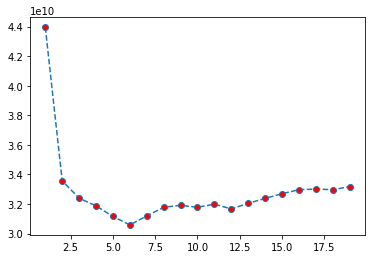

In [37]:
# Plottting of K values and Scores
plt.plot(range(1,20), scores, marker='o', markerfacecolor='r', linestyle='--')

In [38]:
# Optimum k value is 19
final_model = KNeighborsRegressor(n_neighbors=19, metric='euclidean')
final_model.fit(scaled_X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
                    metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                    weights='uniform')

In [39]:
# Prediction on  training data
final_train_pred = final_model.predict(scaled_X_train)
final_train_pred

array([317091.84210526, 461968.42105263, 541684.21052632, ...,
       521613.31578947, 323257.15789474, 553554.        ])

In [40]:
print(r2_score(y_train, final_train_pred))

0.7917616156763304


In [41]:
# Predictions on Test Data
final_test_pred = final_model.predict(scaled_X_test)  # y_test
final_test_pred

array([ 383250.42105263, 1681789.47368421,  501072.84210526, ...,
        697781.57894737,  431689.47368421,  507549.47368421])

In [42]:
print(r2_score(y_test, final_test_pred))

0.7506223750615134


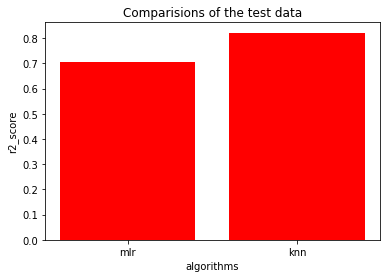

In [43]:
#Comparision of the test data
algorithms=['mlr','knn'] 
r2_score=[0.7052419493142321,0.8212343397542601] 
plt.bar(algorithms,r2_score,color="red")
plt.xlabel("algorithms")
plt.ylabel("r2_score")
plt.title('Comparisions of the test data')
plt.show()